In [1]:
#%pip install vaderSentiment

In [13]:
# Import packages and initialize VADER.
import scienceplots
import matplotlib.pyplot as plt
import pandas as pd
import glob
import transformers
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
analyzer = SentimentIntensityAnalyzer()

plt.style.use(['science', 'ieee', 'grid', 'vibrant', 'no-latex'])


#### Code to process the data.

In [ ]:
# Concatenate translated texts.

filenames = [i for i in glob.glob('../data/interim/translated/*')]
files = []

for i in range(0, len(filenames)):
    files.append(pd.read_csv(filenames[i]))

# Sort & reset index.
df = pd.concat(files).sort_values(by=['fecha', 'enlace_pdf']).reset_index(drop=True)
df = df[['legislatura', 'fecha', 'objeto_iniciativa',
         'numero_expediente', 'autores', 'nombre_sesion', 'orador', 'enlace_pdf',
         'political_group', 'text', 'text_trad']]

print(len(df))

# Removing 351 rows that were not translated.
df = df.loc[df['text_trad'] != '-1']
df = df.loc[df['text_trad'] != -1]

print(f'After filter: {len(df)}')

df.head(2)


In [ ]:
df

,legislatura,fecha,objeto_iniciativa,numero_expediente,autores,nombre_sesion,orador,enlace_pdf,political_group,text,text_trad
0,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Anasagasti Olabeaga, Iñaki Mirena (GV-PNV)",https://www.congreso.es:443/public_oficiales/L...,PNV,"Gracias, señora presidenta. Esta investidura n...","Thank you, Madam President. This investiture h..."
1,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Frutos Gras, Francisco (GIU)",https://www.congreso.es:443/public_oficiales/L...,IU,"Señora presidenta, seño- ras y señores diputad...","Madam President, ladies and gentlemen, Mr. Can..."
2,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Trías i Vidal de Llobatera, Xavier (GC-CiU)",https://www.congreso.es:443/public_oficiales/L...,CIU,"Señora presidenta, señoras y señores diputados...","Madam President, ladies and gentlemen, it is a..."
3,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Martínez Noval, Luis (GS)",https://www.congreso.es:443/public_oficiales/L...,PSOE,"Señora presidenta, señoras y señores diputados...","Madam President, ladies and gentlemen, Mr. Azn..."
4,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Aznar López, José María (GP)",https://www.congreso.es:443/public_oficiales/L...,PP,"Señora presidenta, señorías, en una cosa estoy...","Madam President, ladies and gentlemen, in one ..."
...,...,...,...,...,...,...,...,...,...,...,...
68790,14,2022-12-22,Proyecto de Ley de pesca sostenible e investig...,121/000102/0000,Gobierno,Pleno,"Zambrano García-Raez, Carlos José (GVOX)",https://www.congreso.es:443/public_oficiales/L...,VOX,"Con la venia, señor presidente. Quiero empezar...","With the permission, Mr. President. I want to ..."
68791,14,2022-12-22,Proyecto de Ley del Deporte.,121/000082/0000,Gobierno,Pleno,"Agirretxea Urresti, Joseba Andoni (GV (EAJ-PNV))",https://www.congreso.es:443/public_oficiales/L...,PNV,"Señor presidente, intervengo desde el escaño, ...","Mr President, I am speaking from the seat, if ..."
68792,14,2022-12-22,Proyecto de Ley del Deporte.,121/000082/0000,Gobierno,Pleno,"Álvarez i García, Gerard (GR)",https://www.congreso.es:443/public_oficiales/L...,ERC,"Gràcies, president. Buenas tardes, señorías. H...","Thank you, president. Good afternoon, ladies. ..."
68793,14,2022-12-22,Proyecto de Ley del Deporte.,121/000082/0000,Gobierno,Pleno,"Jover Díaz, Antonia (GCUP-EC-GC)",https://www.congreso.es:443/public_oficiales/L...,UP,"Bon dia, president. Señorías, seré breve, porq...","Good morning, president. Ladies and gentlemen,..."


In [4]:
#df7 = df.loc[df['legislatura'] != 12].reset_index(drop=True)
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')

df['y-m'] = df.fecha.dt.strftime('%Y-%m')
df['y-q'] = pd.PeriodIndex(df['fecha'], freq='Q')
df['y'] = df.fecha.dt.strftime('%Y')

In [9]:
scores = [analyzer.polarity_scores(t) for t in df['text_trad'].tolist()]

In [5]:
import re

# Using regex to count the words in each intv.
lengths = [len(re.findall(r'\w+', t)) for t in df['text_trad'].tolist()]

In [11]:
df['vader_com'] = [item['compound'] for item in scores]
df['vader_neg'] = [item['neg'] for item in scores]
df['vader_neu'] = [item['neu'] for item in scores]
df['vader_pos'] = [item['pos'] for item in scores]

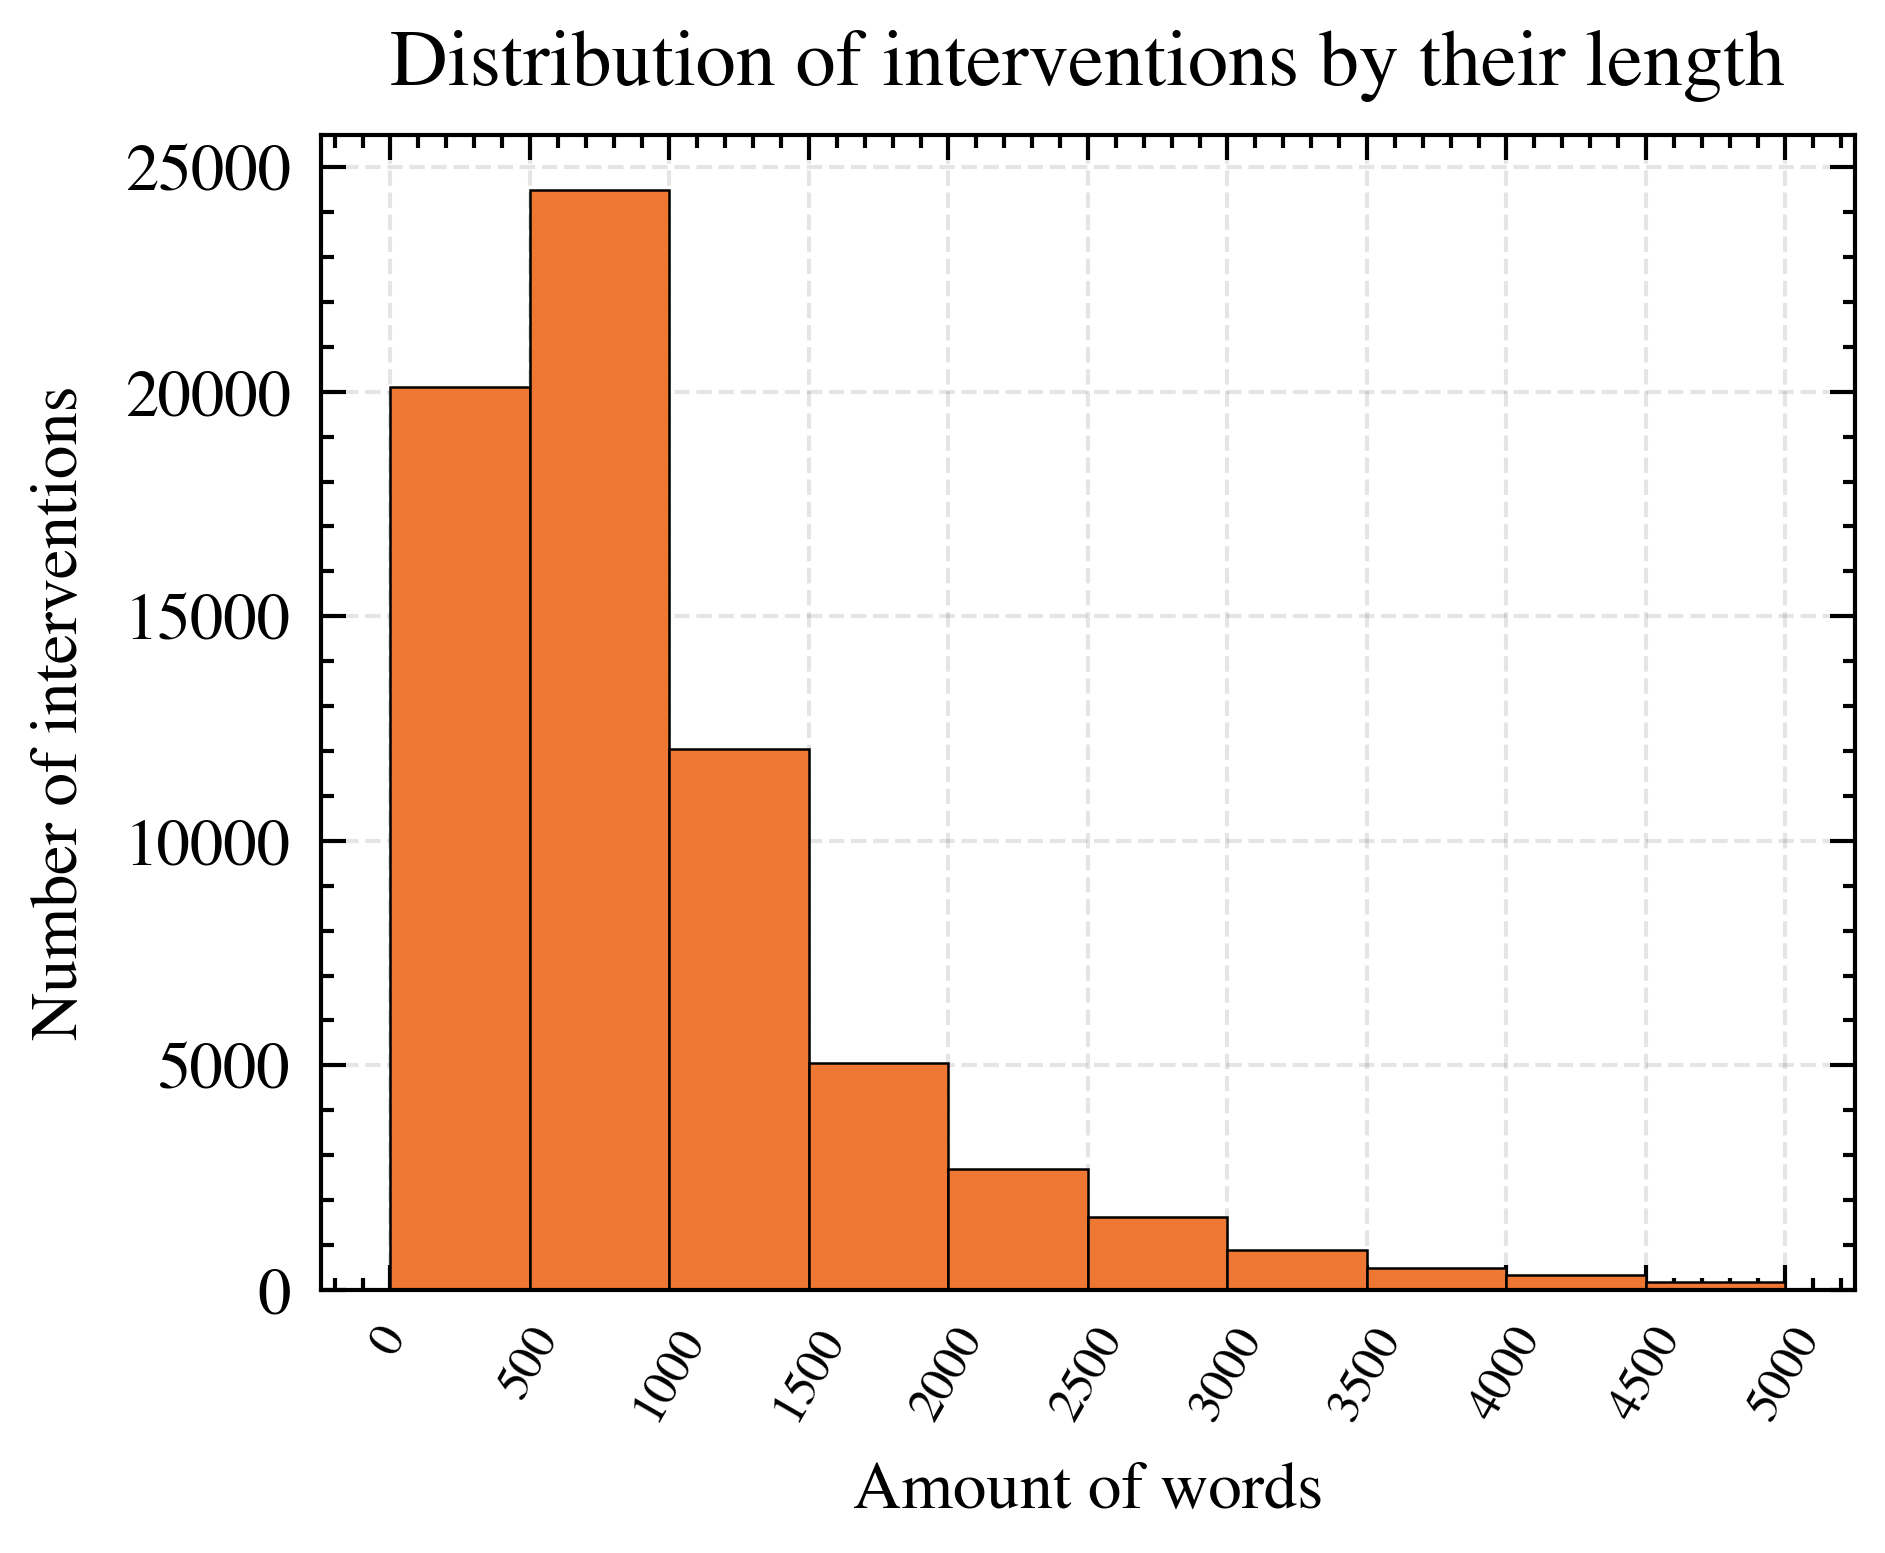

In [36]:
fig, ax = plt.subplots()
bin_ranges = range(0, 5500, 500)

ax.hist(lengths, bins=bin_ranges, edgecolor='black', linewidth=.3)
ax.set_xticks(bin_ranges)
ax.set_xticklabels(bin_ranges, rotation=60, fontsize=6)
ax.set_xlabel('Amount of words')
ax.set_ylabel('Number of interventions')
ax.set_title('Distribution of interventions by their length')
ax.grid(alpha=0.1)


In [12]:
df['lengths'] = lengths

In [6]:
#df.to_csv('../data/final/vader_processed.csv', index=False)

In [14]:
df = pd.read_csv('../data/final/vader_processed.csv')
df

,legislatura,fecha,objeto_iniciativa,numero_expediente,autores,nombre_sesion,orador,enlace_pdf,political_group,text,text_trad,y-m,y,vader_com,vader_neg,vader_neu,vader_pos,lengths,y-q
0,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Anasagasti Olabeaga, Iñaki Mirena (GV-PNV)",https://www.congreso.es:443/public_oficiales/L...,PNV,"Gracias, señora presidenta. Esta investidura n...","Thank you, Madam President. This investiture h...",2000-04,2000,0.9824,0.117,0.758,0.126,6436,2000Q2
1,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Frutos Gras, Francisco (GIU)",https://www.congreso.es:443/public_oficiales/L...,IU,"Señora presidenta, seño- ras y señores diputad...","Madam President, ladies and gentlemen, Mr. Can...",2000-04,2000,1.0000,0.066,0.801,0.133,8207,2000Q2
2,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Trías i Vidal de Llobatera, Xavier (GC-CiU)",https://www.congreso.es:443/public_oficiales/L...,CIU,"Señora presidenta, señoras y señores diputados...","Madam President, ladies and gentlemen, it is a...",2000-04,2000,1.0000,0.026,0.816,0.158,5249,2000Q2
3,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Martínez Noval, Luis (GS)",https://www.congreso.es:443/public_oficiales/L...,PSOE,"Señora presidenta, señoras y señores diputados...","Madam President, ladies and gentlemen, Mr. Azn...",2000-04,2000,0.9999,0.055,0.830,0.115,6825,2000Q2
4,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Aznar López, José María (GP)",https://www.congreso.es:443/public_oficiales/L...,PP,"Señora presidenta, señorías, en una cosa estoy...","Madam President, ladies and gentlemen, in one ...",2000-04,2000,0.9989,0.072,0.791,0.137,1690,2000Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68502,14,2022-12-22,Proyecto de Ley de pesca sostenible e investig...,121/000102/0000,Gobierno,Pleno,"Zambrano García-Raez, Carlos José (GVOX)",https://www.congreso.es:443/public_oficiales/L...,VOX,"Con la venia, señor presidente. Quiero empezar...","With the permission, Mr. President. I want to ...",2022-12,2022,0.9970,0.056,0.827,0.117,1098,2022Q4
68503,14,2022-12-22,Proyecto de Ley del Deporte.,121/000082/0000,Gobierno,Pleno,"Agirretxea Urresti, Joseba Andoni (GV (EAJ-PNV))",https://www.congreso.es:443/public_oficiales/L...,PNV,"Señor presidente, intervengo desde el escaño, ...","Mr President, I am speaking from the seat, if ...",2022-12,2022,0.9772,0.000,0.889,0.111,224,2022Q4
68504,14,2022-12-22,Proyecto de Ley del Deporte.,121/000082/0000,Gobierno,Pleno,"Álvarez i García, Gerard (GR)",https://www.congreso.es:443/public_oficiales/L...,ERC,"Gràcies, president. Buenas tardes, señorías. H...","Thank you, president. Good afternoon, ladies. ...",2022-12,2022,0.9970,0.032,0.814,0.154,537,2022Q4
68505,14,2022-12-22,Proyecto de Ley del Deporte.,121/000082/0000,Gobierno,Pleno,"Jover Díaz, Antonia (GCUP-EC-GC)",https://www.congreso.es:443/public_oficiales/L...,UP,"Bon dia, president. Señorías, seré breve, porq...","Good morning, president. Ladies and gentlemen,...",2022-12,2022,0.9899,0.044,0.857,0.099,717,2022Q4


In [21]:
cnt = df['vader_com'].groupby(df['y']).count()

In [19]:
neg = []
pos = []
for item in df.vader_com.tolist():
    if item < -0.05:
        neg.append(1)
    else:
        neg.append(0)

for item in df.vader_com.tolist():
    if item > 0.05:
        pos.append(1)
    else:
        pos.append(0)

df['neg'] = neg
df['pos'] = pos

Text(0, 0.5, '% of negatively-labelled interventions')

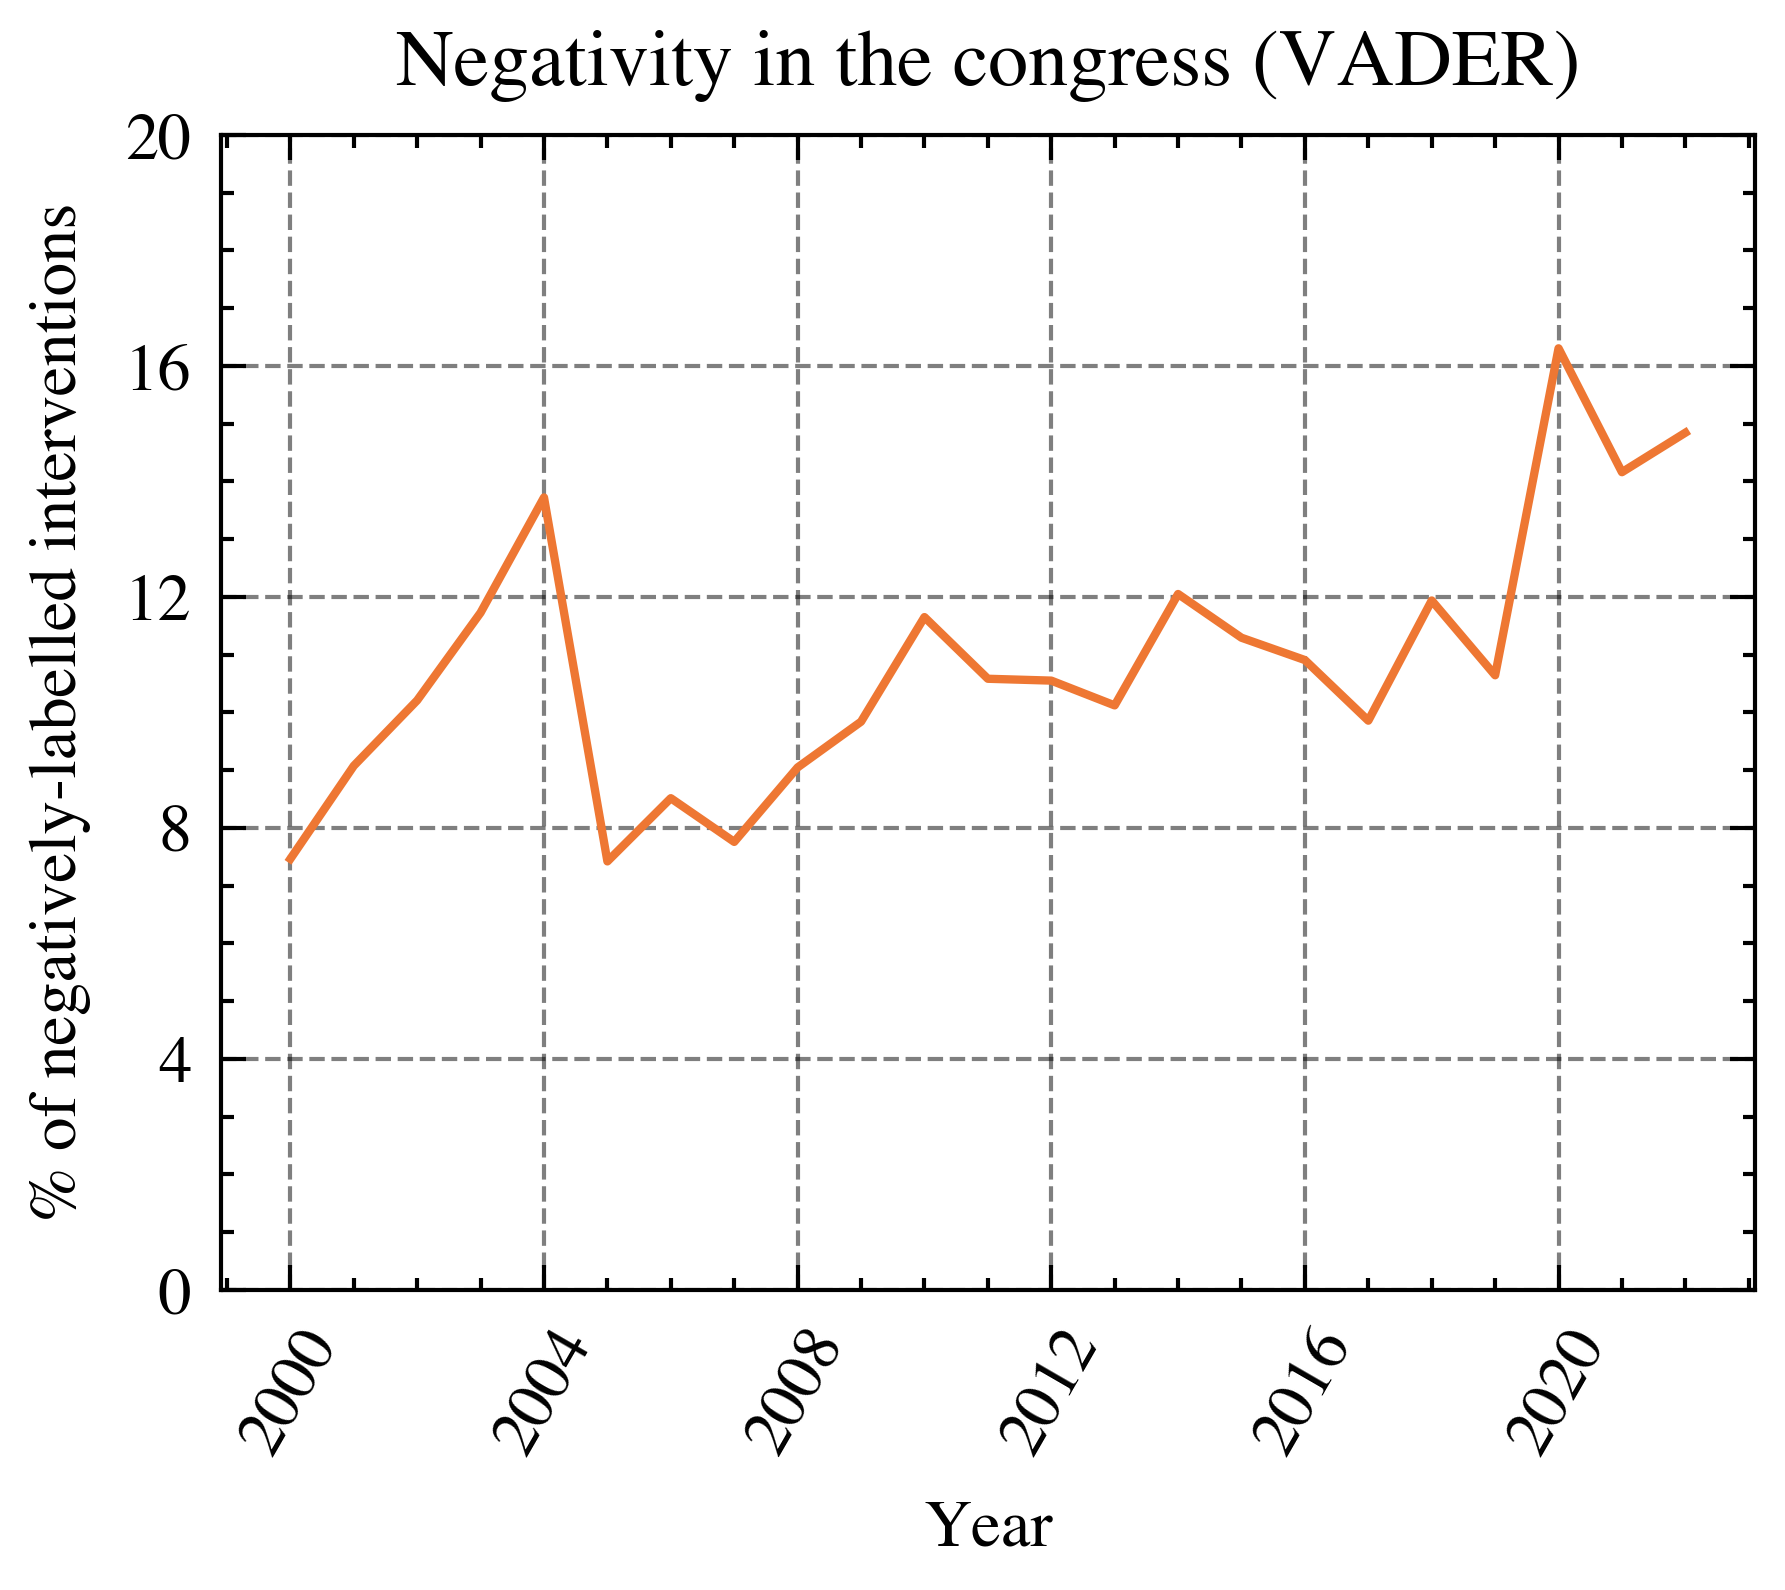

In [80]:
#daily_avg = df7['vader_sent'].groupby(df7['fecha']).sum()/cnt
daily_neg = df['neg'].groupby(df['y']).sum()/cnt * 100

fig, ax = plt.subplots()

x = daily_neg.index.tolist()

ax.plot(daily_neg)
ax.set_yticks(range(0, 21, 4))
ax.set_xticks(range(2000, 2023, 4))
ax.set_xticklabels(range(2000, 2023, 4), rotation=60)

ax.set_title('Negativity in the congress (VADER)')
ax.set_xlabel('Year')
ax.set_ylabel('%' + ' of negatively-labelled interventions')


Text(2021, 1, 'PSOE +\nUP')

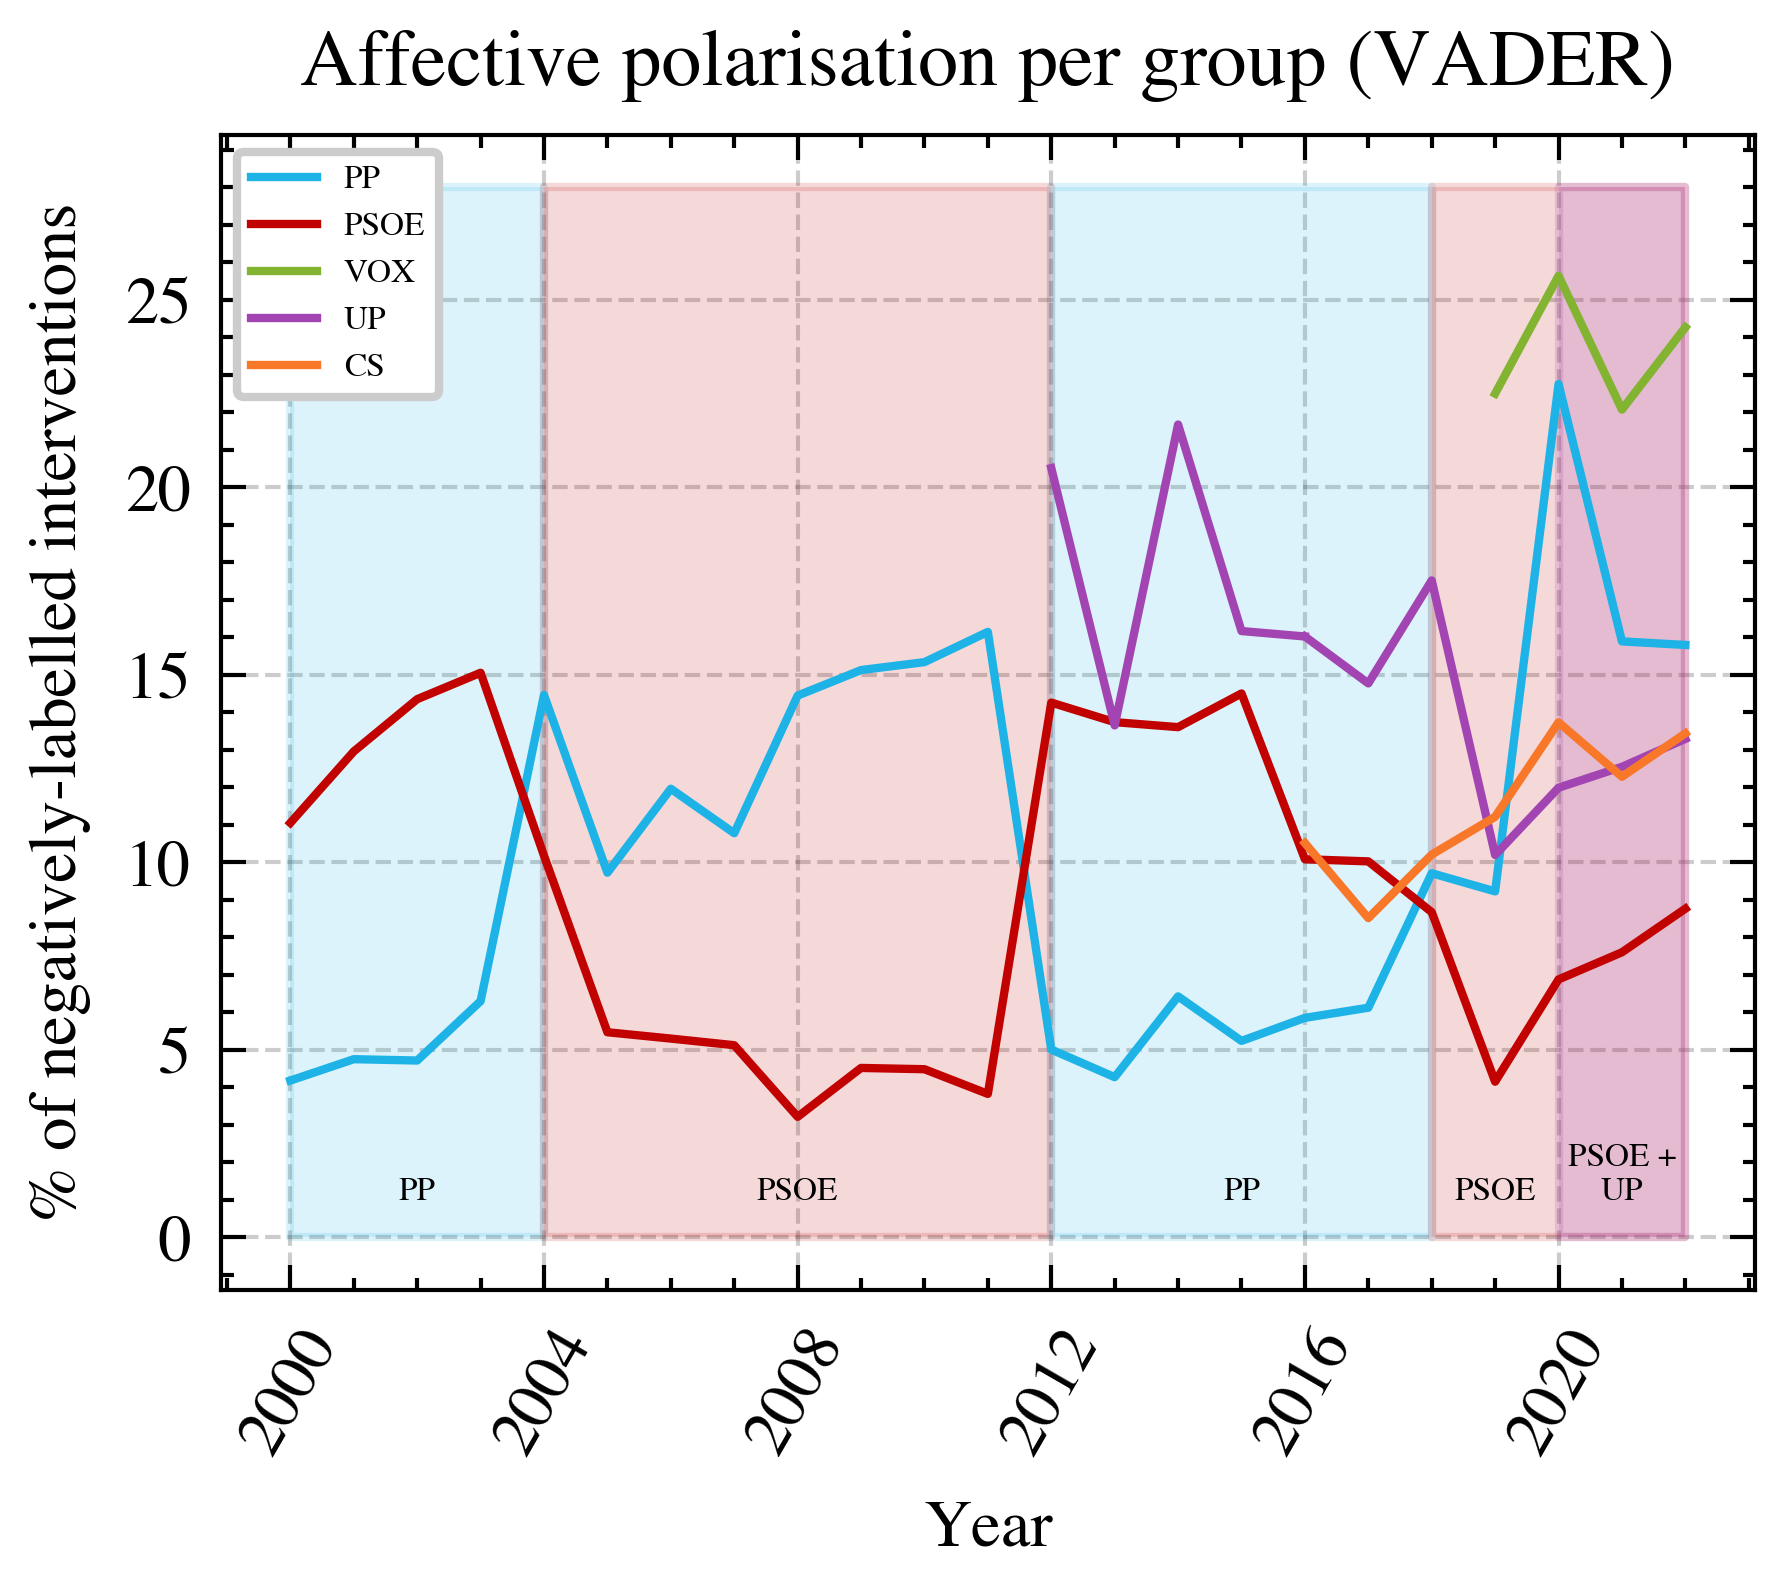

In [137]:
per_group = df.groupby(['political_group', 'y'], as_index=False)[
    'vader_com'].count()
per_group['neg_count'] = df.groupby(['political_group', 'y'], as_index=False)[
    'neg'].sum()['neg']

per_group.columns = ['political_group', 'year', 'count', 'neg_count']

PP = per_group.loc[per_group['political_group'] == 'PP'].set_index('year')
PP = PP['neg_count'] / PP['count'] * 100

PSOE = per_group.loc[per_group['political_group'] == 'PSOE'].set_index('year')
PSOE = PSOE['neg_count'] / PSOE['count'] * 100

VOX = per_group.loc[per_group['political_group'] == 'VOX'].set_index('year')
VOX = VOX['neg_count'] / VOX['count'] * 100

UP = per_group.loc[per_group['political_group'] == 'UP'].set_index('year')
UP = UP['neg_count'] / UP['count'] * 100

IU = per_group.loc[per_group['political_group'] == 'IU'].set_index('year')
IU = IU['neg_count'] / IU['count'] * 100
IU = IU.loc[IU.index > 2011]
IU[2016] = UP[2016]

CS = per_group.loc[per_group['political_group'] == 'CS'].set_index('year')
CS = CS['neg_count'] / CS['count'] * 100

ERC = per_group.loc[per_group['political_group'] == 'ERC'].set_index('year')
ERC = ERC['neg_count'] / ERC['count'] * 100

CIU = per_group.loc[per_group['political_group'] == 'CIU'].set_index('year')
CIU = CIU['neg_count'] / CIU['count'] * 100

EHB = per_group.loc[per_group['political_group'] == 'EHB'].set_index('year')
EHB = EHB['neg_count'] / EHB['count'] * 100

fig, ax = plt.subplots()

ax.plot(PP, label='PP', c='#1eb3e6')
ax.plot(PSOE, label='PSOE', c='#c10200')
ax.plot(VOX, label='VOX', c='#82b431')
ax.plot(UP, label='UP', c='#a245b2')
ax.plot(IU, c='#a245b2')
ax.plot(CS, label='CS', c='#f87729')
#ax.plot(ERC, label='ERC', c='black')
#ax.plot(CIU, label='CIU', c='green')
#ax.plot(EHB, label='EHB', c='yellow')

ax.set_yticks(range(0, 30, 5))
ax.set_xticks(range(2000, 2023, 4))
ax.set_xticklabels(range(2000, 2023, 4), rotation=60)
ax.legend(fontsize=4)
ax.set_title('Affective polarisation per group (VADER)')
ax.set_xlabel('Year')
ax.set_ylabel('%' + ' of negatively-labelled interventions')

ax.grid(alpha=.2)

ax.fill_between(PP.index[:5], 28, color='#1eb3e6', alpha=.15)
ax.fill_between(PP.index[4:13], 28, color='#c10200', alpha=.15)
ax.fill_between(PP.index[12:19], 28, color='#1eb3e6', alpha=.15)
ax.fill_between(PP.index[18:], 28, color='#c10200', alpha=.15)
ax.fill_between(PP.index[20:], 28, color='#a245b2', alpha=.2)

ax.text(2002, 1, 'PP', fontsize=4, horizontalalignment='center')
ax.text(2008, 1, 'PSOE', fontsize=4, horizontalalignment='center')
ax.text(2015, 1, 'PP', fontsize=4, horizontalalignment='center')
ax.text(2019, 1, 'PSOE', fontsize=4, horizontalalignment='center')
ax.text(2021, 1, 'PSOE +\nUP', fontsize=4, horizontalalignment='center')


In [64]:
df.groupby(['political_group', 'y-m'], as_index=False)[
    'vader_com'].count()


,political_group,y-m,vader_com
0,CIU,2000-04,1
1,CIU,2000-05,17
2,CIU,2000-06,20
3,CIU,2000-07,2
4,CIU,2000-09,29
...,...,...,...
1380,VOX,2022-08,14
1381,VOX,2022-09,110
1382,VOX,2022-10,187
1383,VOX,2022-11,102


In [22]:
per_group.political_group.unique()

array(['CS', 'EHB', 'ERC', 'PNV', 'PP', 'PSOE', 'UP', 'VOX'], dtype=object)

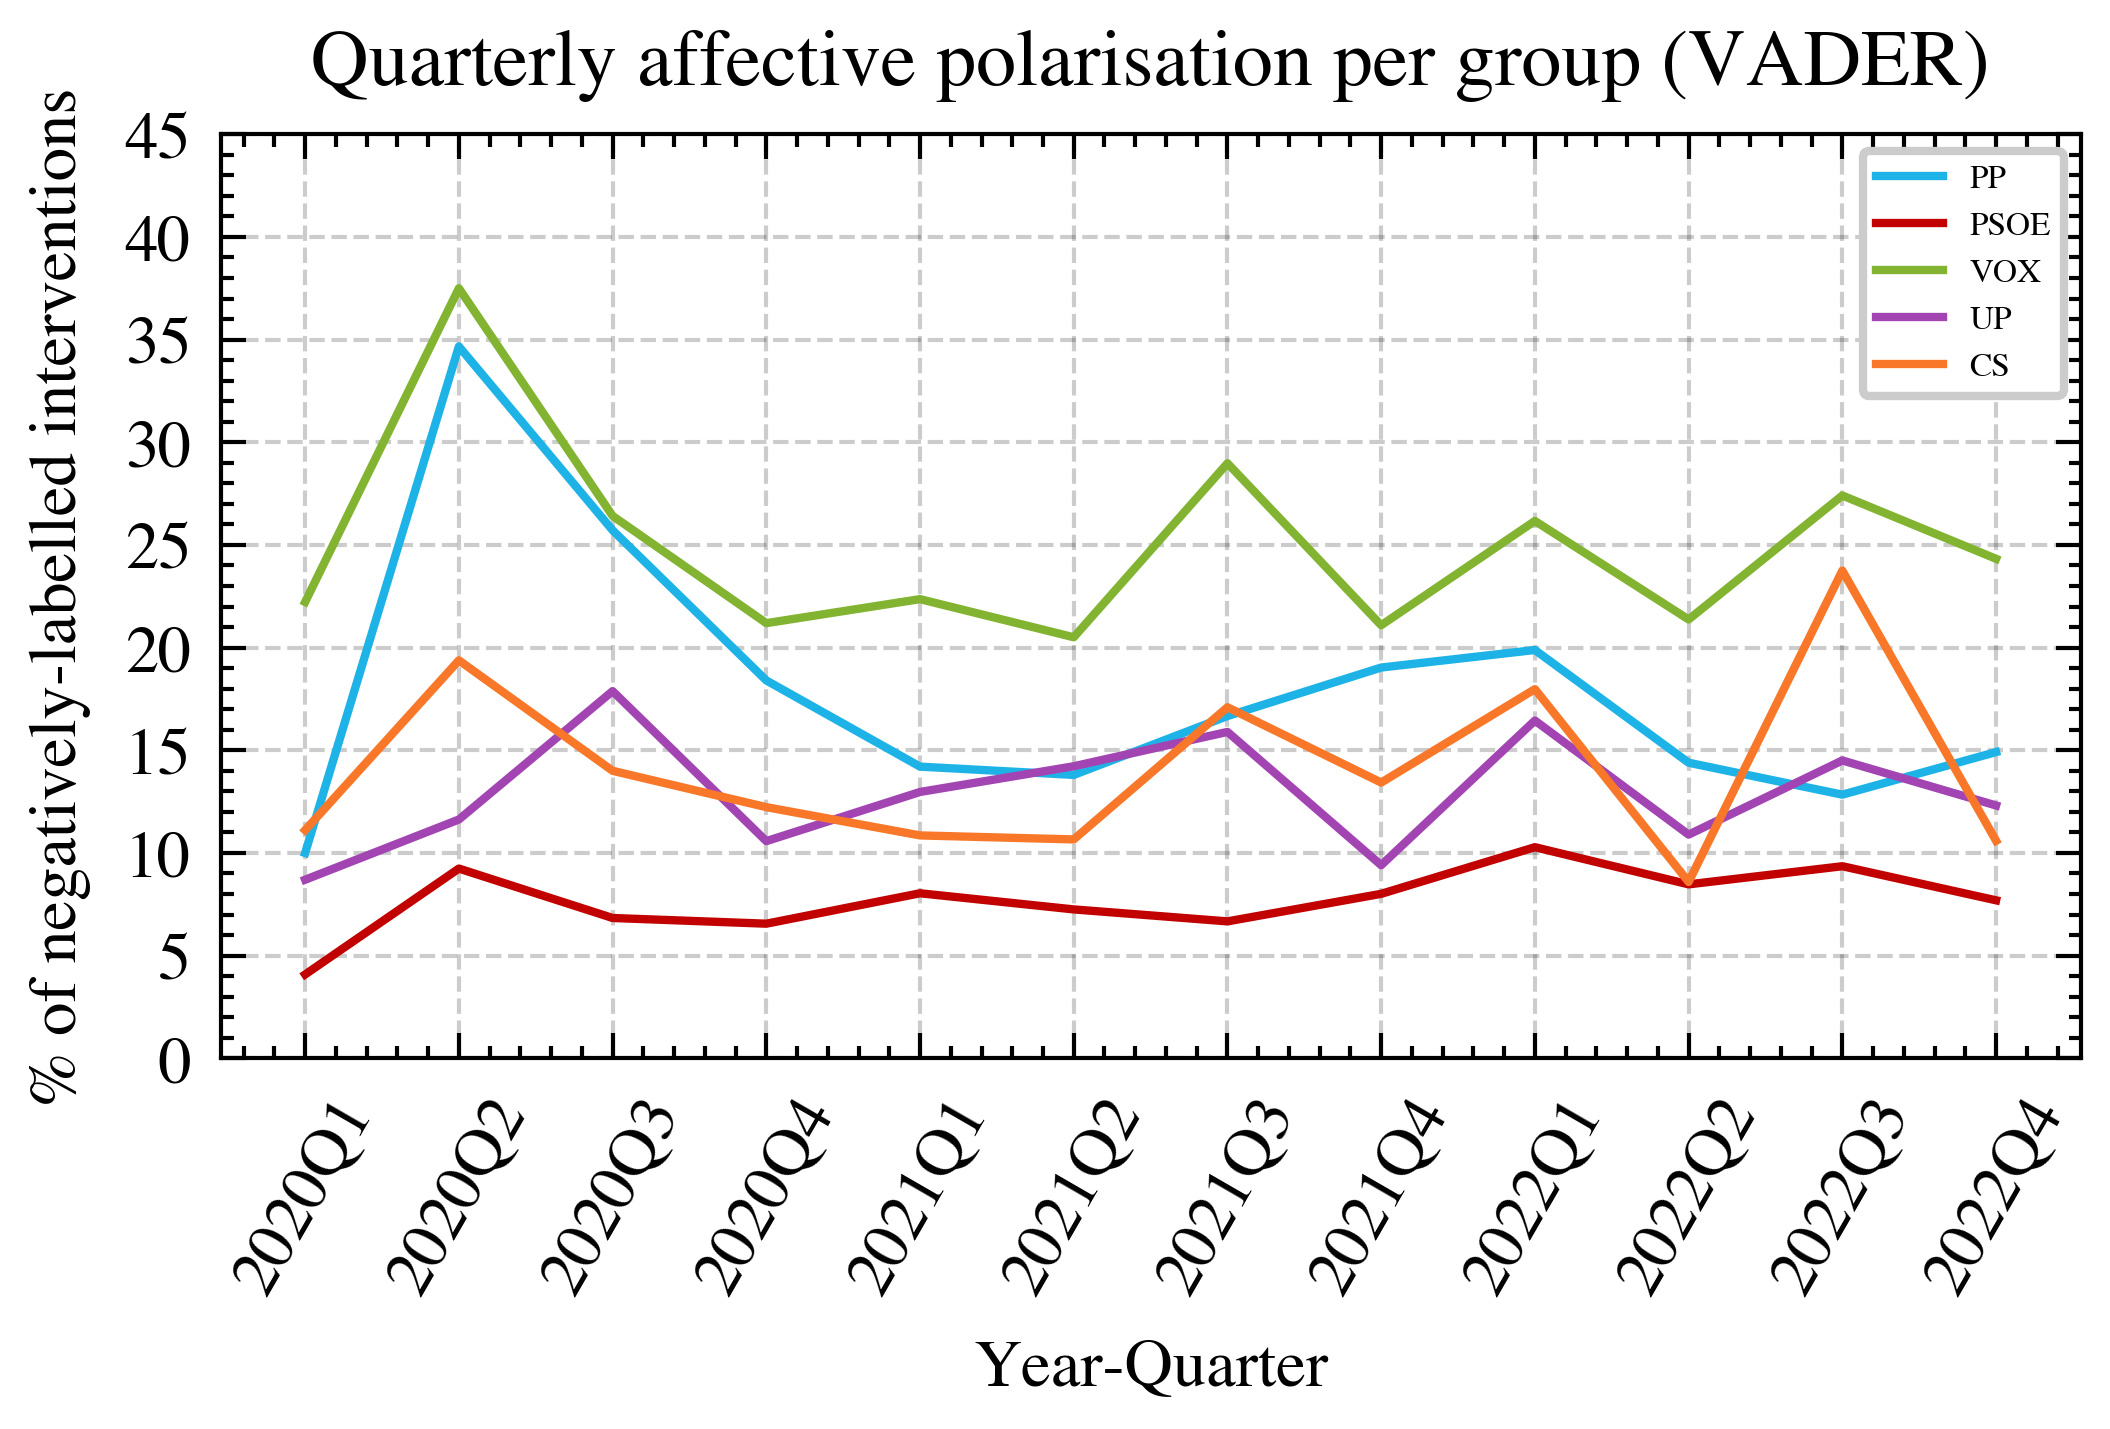

In [161]:
per_group = df.groupby(['political_group', 'y-q'], as_index=False)[
    'vader_com'].count()
per_group['neg_count'] = df.groupby(['political_group', 'y-q'], as_index=False)[
    'neg'].sum()['neg']

per_group = per_group.loc[per_group['y-q'] > '2019Q4']

per_group.columns = ['political_group', 'y-q', 'count', 'neg_count']

PP = per_group.loc[per_group['political_group'] == 'PP'].set_index('y-q')
PP = PP['neg_count'] / PP['count'] * 100

PSOE = per_group.loc[per_group['political_group'] == 'PSOE'].set_index('y-q')
PSOE = PSOE['neg_count'] / PSOE['count'] * 100

VOX = per_group.loc[per_group['political_group'] == 'VOX'].set_index('y-q')
VOX = VOX['neg_count'] / VOX['count'] * 100

UP = per_group.loc[per_group['political_group'] == 'UP'].set_index('y-q')
UP = UP['neg_count'] / UP['count'] * 100

CS = per_group.loc[per_group['political_group'] == 'CS'].set_index('y-q')
CS = CS['neg_count'] / CS['count'] * 100

fig, ax = plt.subplots(figsize=(4,2))

ax.plot(PP, label='PP', c='#1eb3e6')
ax.plot(PSOE, label='PSOE', c='#c10200')
ax.plot(VOX, label='VOX', c='#82b431')
ax.plot(UP, label='UP', c='#a245b2')
ax.plot(CS, label='CS', c='#f87729')

ax.set_yticks(range(0, 50, 5))
ax.set_xticks(PP.index, rotation = 60)
ax.set_xticklabels(PP.index, rotation=60)
ax.legend(fontsize=4)
ax.set_title('Quarterly affective polarisation per group (VADER)')
ax.set_xlabel('Year-Quarter')
ax.set_ylabel('%' + ' of negatively-labelled interventions')

ax.grid(alpha=.2)

#ax.fill_between(PP.index[:5], 28, color='#1eb3e6', alpha=.15)
#ax.fill_between(PP.index[4:13], 28, color='#c10200', alpha=.15)
#ax.fill_between(PP.index[12:20], 28, color='#1eb3e6', alpha=.15)
#ax.fill_between(PP.index[18:], 28, color='#c10200', alpha=.15)
#ax.fill_between(PP.index[20:], 28, color='#a245b2', alpha=.2)

#ax.text(2002, 1, 'PP', fontsize=4, horizontalalignment='center')
#ax.text(2008, 1, 'PSOE', fontsize=4, horizontalalignment='center')
#ax.text(2016, 1, 'PP', fontsize=4, horizontalalignment='center')
#ax.text(2019, 1, 'PSOE', fontsize=4, horizontalalignment='center')
#ax.text(2021, 1, 'PSOE +\nUP', fontsize=4, horizontalalignment='center')


In [ ]:
# Attempt of monthly polarisation plot.

per_group = df.groupby(['political_group', 'y-m'], as_index=False)[
    'vader_com'].count()
per_group['neg_count'] = df.groupby(['political_group', 'y-m'], as_index=False)[
    'neg'].sum()['neg']

per_group = per_group.loc[(per_group['y-m'] > '2021-12')]

per_group.columns = ['political_group', 'y-m', 'count', 'neg_count']

PP = per_group.loc[per_group['political_group'] == 'PP'].set_index('y-m')
PP = PP['neg_count'] / PP['count'] * 100

PSOE = per_group.loc[per_group['political_group'] == 'PSOE'].set_index('y-m')
PSOE = PSOE['neg_count'] / PSOE['count'] * 100

VOX = per_group.loc[per_group['political_group'] == 'VOX'].set_index('y-m')
VOX = VOX['neg_count'] / VOX['count'] * 100

UP = per_group.loc[per_group['political_group'] == 'UP'].set_index('y-m')
UP = UP['neg_count'] / UP['count'] * 100

CS = per_group.loc[per_group['political_group'] == 'CS'].set_index('y-m')
CS = CS['neg_count'] / CS['count'] * 100

fig, ax = plt.subplots()

ax.plot(PP, label='PP', c='#1eb3e6')
ax.plot(PSOE, label='PSOE', c='#c10200')
ax.plot(VOX, label='VOX', c='#82b431')
ax.plot(UP, label='UP', c='#a245b2')
ax.plot(CS, label='CS', c='#f87729')

ax.set_yticks(range(0, 50, 5))
ax.set_xticks(PP.index, rotation=90)
ax.set_xticklabels(PP.index, rotation=90)
ax.legend(fontsize=4)
ax.set_title('Polarisation per group (VADER) for 2020-2022')
ax.set_xlabel('Year-Month')
ax.set_ylabel('%' + ' of negatively-labelled interventions')

#ax.grid(alpha=.2)

#ax.fill_between(PP.index[:5], 28, color='#1eb3e6', alpha=.15)
#ax.fill_between(PP.index[4:13], 28, color='#c10200', alpha=.15)
#ax.fill_between(PP.index[12:20], 28, color='#1eb3e6', alpha=.15)
#ax.fill_between(PP.index[18:], 28, color='#c10200', alpha=.15)
#ax.fill_between(PP.index[20:], 28, color='#a245b2', alpha=.2)

#ax.text(2002, 1, 'PP', fontsize=4, horizontalalignment='center')
#ax.text(2008, 1, 'PSOE', fontsize=4, horizontalalignment='center')
#ax.text(2016, 1, 'PP', fontsize=4, horizontalalignment='center')
#ax.text(2019, 1, 'PSOE', fontsize=4, horizontalalignment='center')
#ax.text(2021, 1, 'PSOE +\nUP', fontsize=4, horizontalalignment='center')


### Transformers usage

In [3]:
# https://huggingface.co/cardiffnlp/twitter-xlm-roberta-base-sentiment
from transformers import pipeline
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [52]:
def roberta_sentiment(row):
    test = row.split('.')

    sentence_labels = []
    for sentence in test:
        try:
            sentence_labels.append(sentiment_task(sentence))
        except:
            sentence_labels.append([{'label': 'error', 'score': np.nan}])
    
    #sentence_labels = [sentiment_task(sentence) for sentence in test]
    #lengths2 = [len(re.findall(r'\w+', sentence)) for sentence in test]

    return sentence_labels

#### Running the remaining years

In [53]:
year = 2000
interventions = df.loc[df['y'] == year].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


##### Concatenating results

In [2]:
import json
'''
for year in range(2000, 2023):
    with open(f"../data/interim/fixed_sent_y_{year}.txt", 'r') as f:
        yearly = json.loads(f.read())

    with open(f"../data/interim/transformer_concat.txt", "a") as output:
        output.write(str(yearly))
'''


'\nfor year in range(2000, 2023):\n    with open(f"../data/interim/fixed_sent_y_{year}.txt", \'r\') as f:\n        yearly = json.loads(f.read())\n\n    with open(f"../data/interim/transformer_concat.txt", "a") as output:\n        output.write(str(yearly))\n'

In [16]:
with open('../data/interim/transformer_concat.txt', 'r') as f:
    transf = json.loads(f.read())

    transf_neg = []

    for i in range(len(transf)):

        neg = 0
        pos = 0
        neu = 0

        for l in range(len(transf[i])):
            if transf[i][l]['label'] == 'positive':
                pos += 1
            elif transf[i][l]['label'] == 'neutral':
                neu += 1
            elif transf[i][l]['label'] == 'negative':
                neg += 1

        if (neg > neu) & (neg > pos):
            transf_neg.append(1)
        else:
            transf_neg.append(0)


df['transf_neg'] = transf_neg


In [17]:
#df.to_csv('../data/final/vader_processed.csv', index=False)


#### Plotting the results

Text(0, 0.5, 'Mass polarisation index (0-100)')

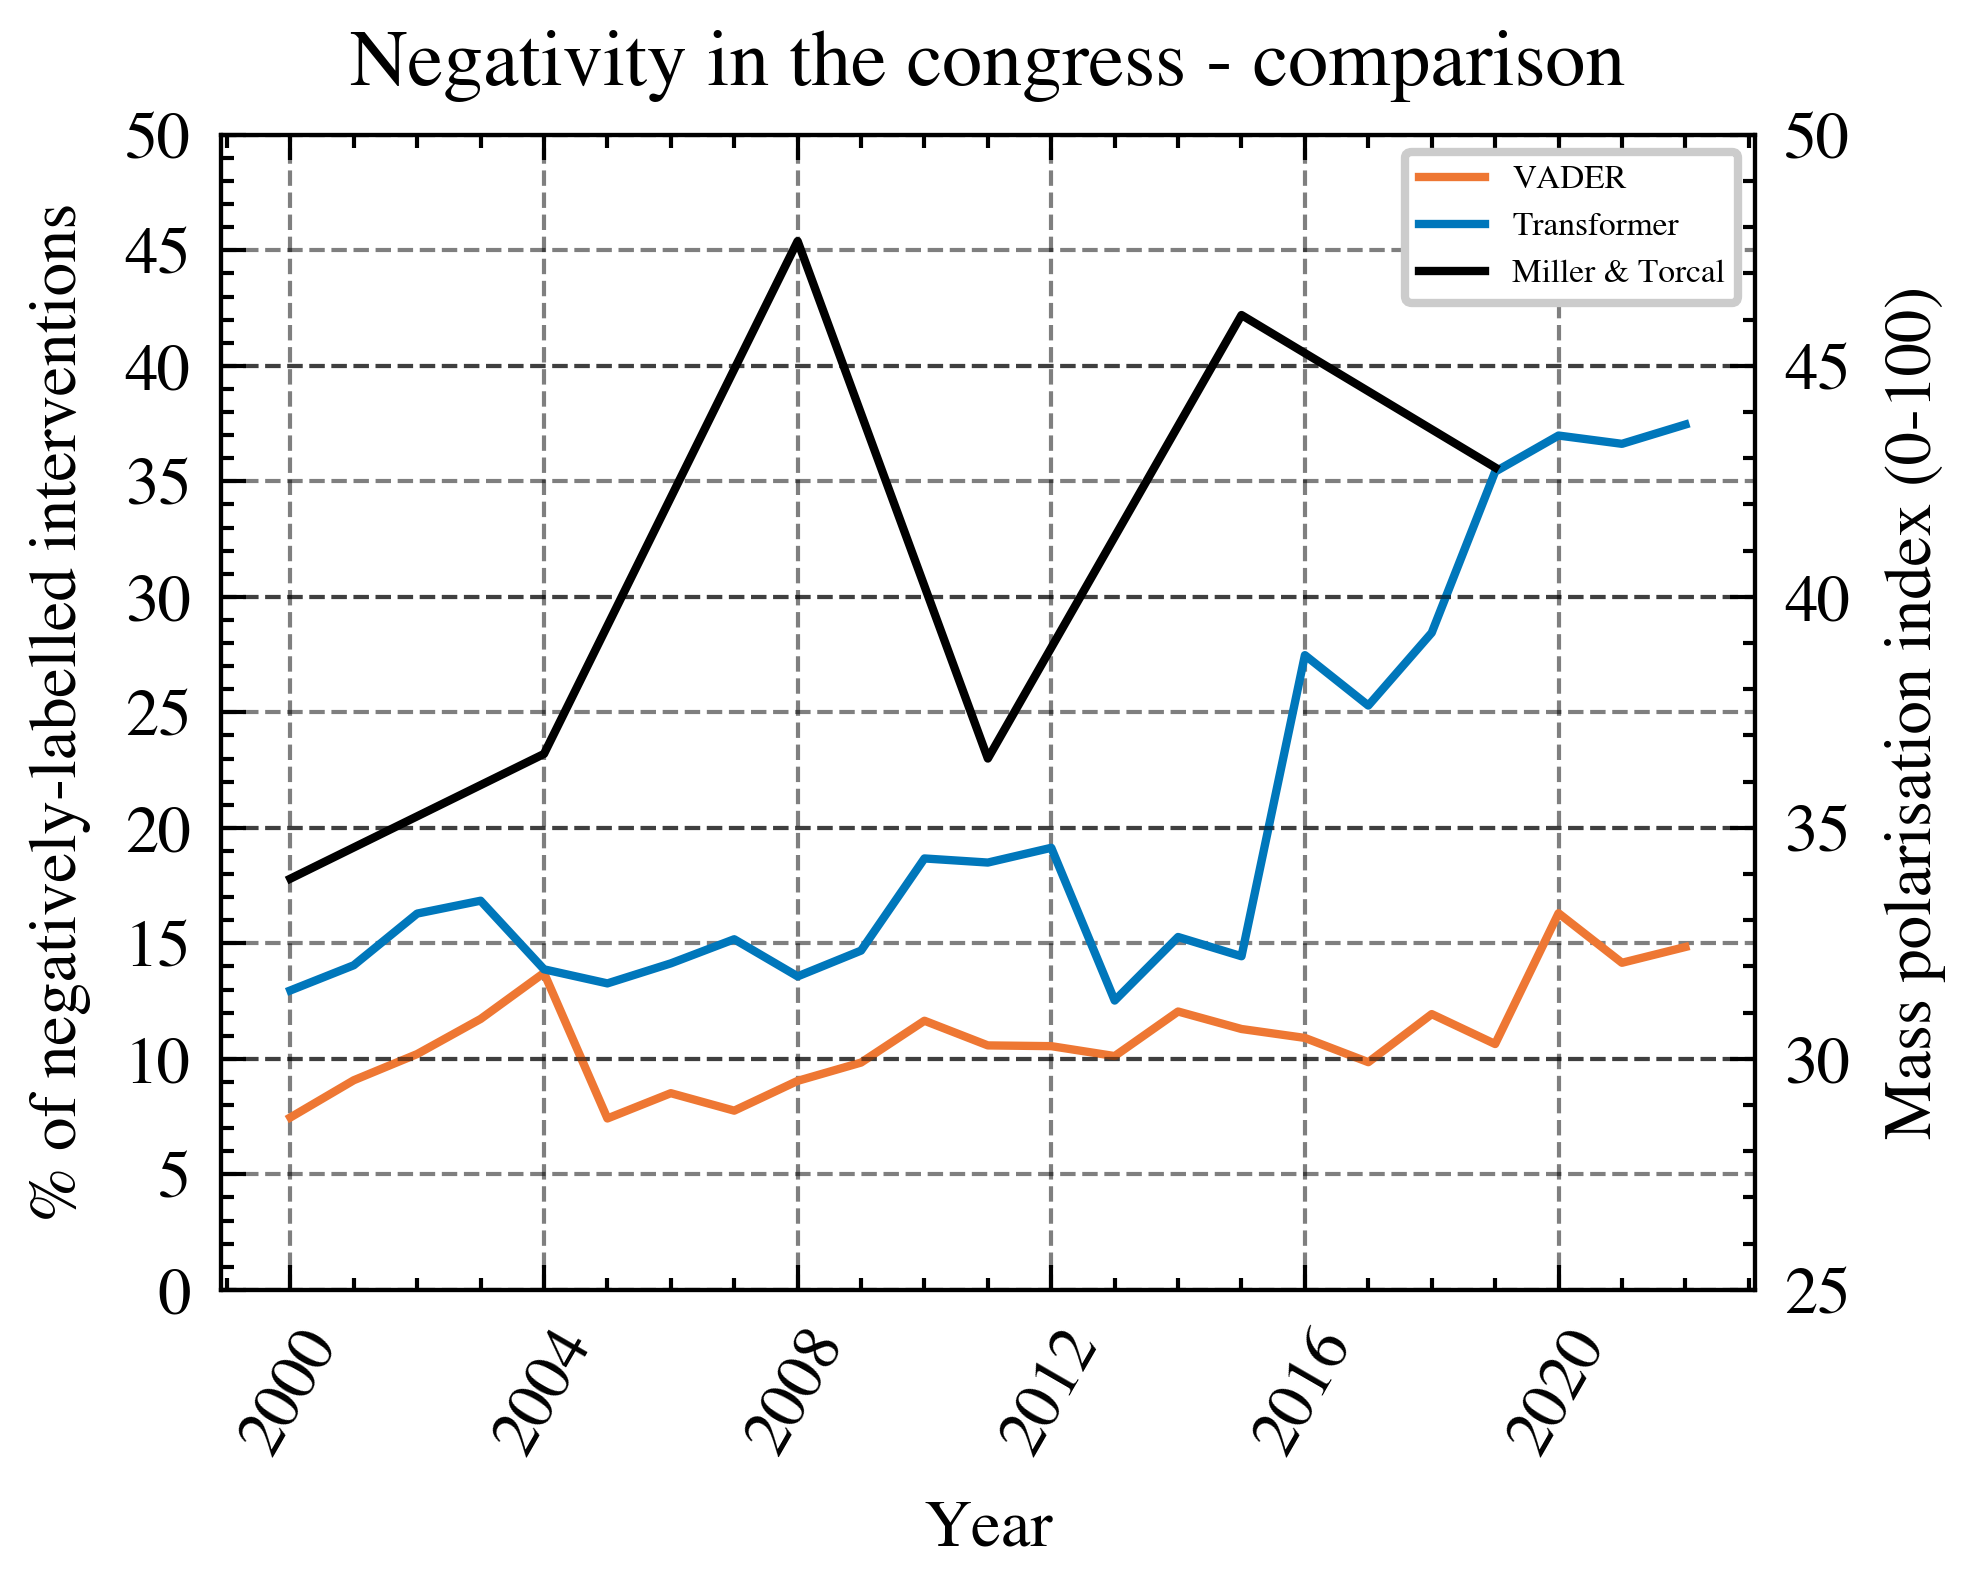

In [39]:
fig, ax = plt.subplots()

x = range(2000, 2023)


index = [2000, 2004, 2008, 2011, 2015, 2019]
miller = [3.39, 3.66, 4.77, 3.65, 4.61, 4.28]
mi = pd.DataFrame(index=index, data={'miller': miller})

vader = df['neg'].groupby(df['y']).sum()/cnt * 100
transformer = df['transf_neg'].groupby(df['y']).sum()/cnt * 100
mi.miller = mi.miller * 10

l1 = ax.plot(vader, label='VADER')
l2 = ax.plot(transformer, label='Transformer')

ax2 = ax.twinx()
l3 = ax2.plot(mi.miller, label= 'Miller & Torcal', c='black')

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, fontsize=4)

ax.set_yticks(range(0, 55, 5))
ax2.set_yticks(range(25, 55, 5))
ax.set_xticks(range(2000, 2023, 4))
ax.set_xticklabels(range(2000, 2023, 4), rotation=60)

ax.set_title('Negativity in the congress - comparison')
ax.set_xlabel('Year')
ax.set_ylabel('%' + ' of negatively-labelled interventions')
ax2.set_ylabel('Mass polarisation index (0-100)')


Text(2021, 1, 'PSOE +\nUP')

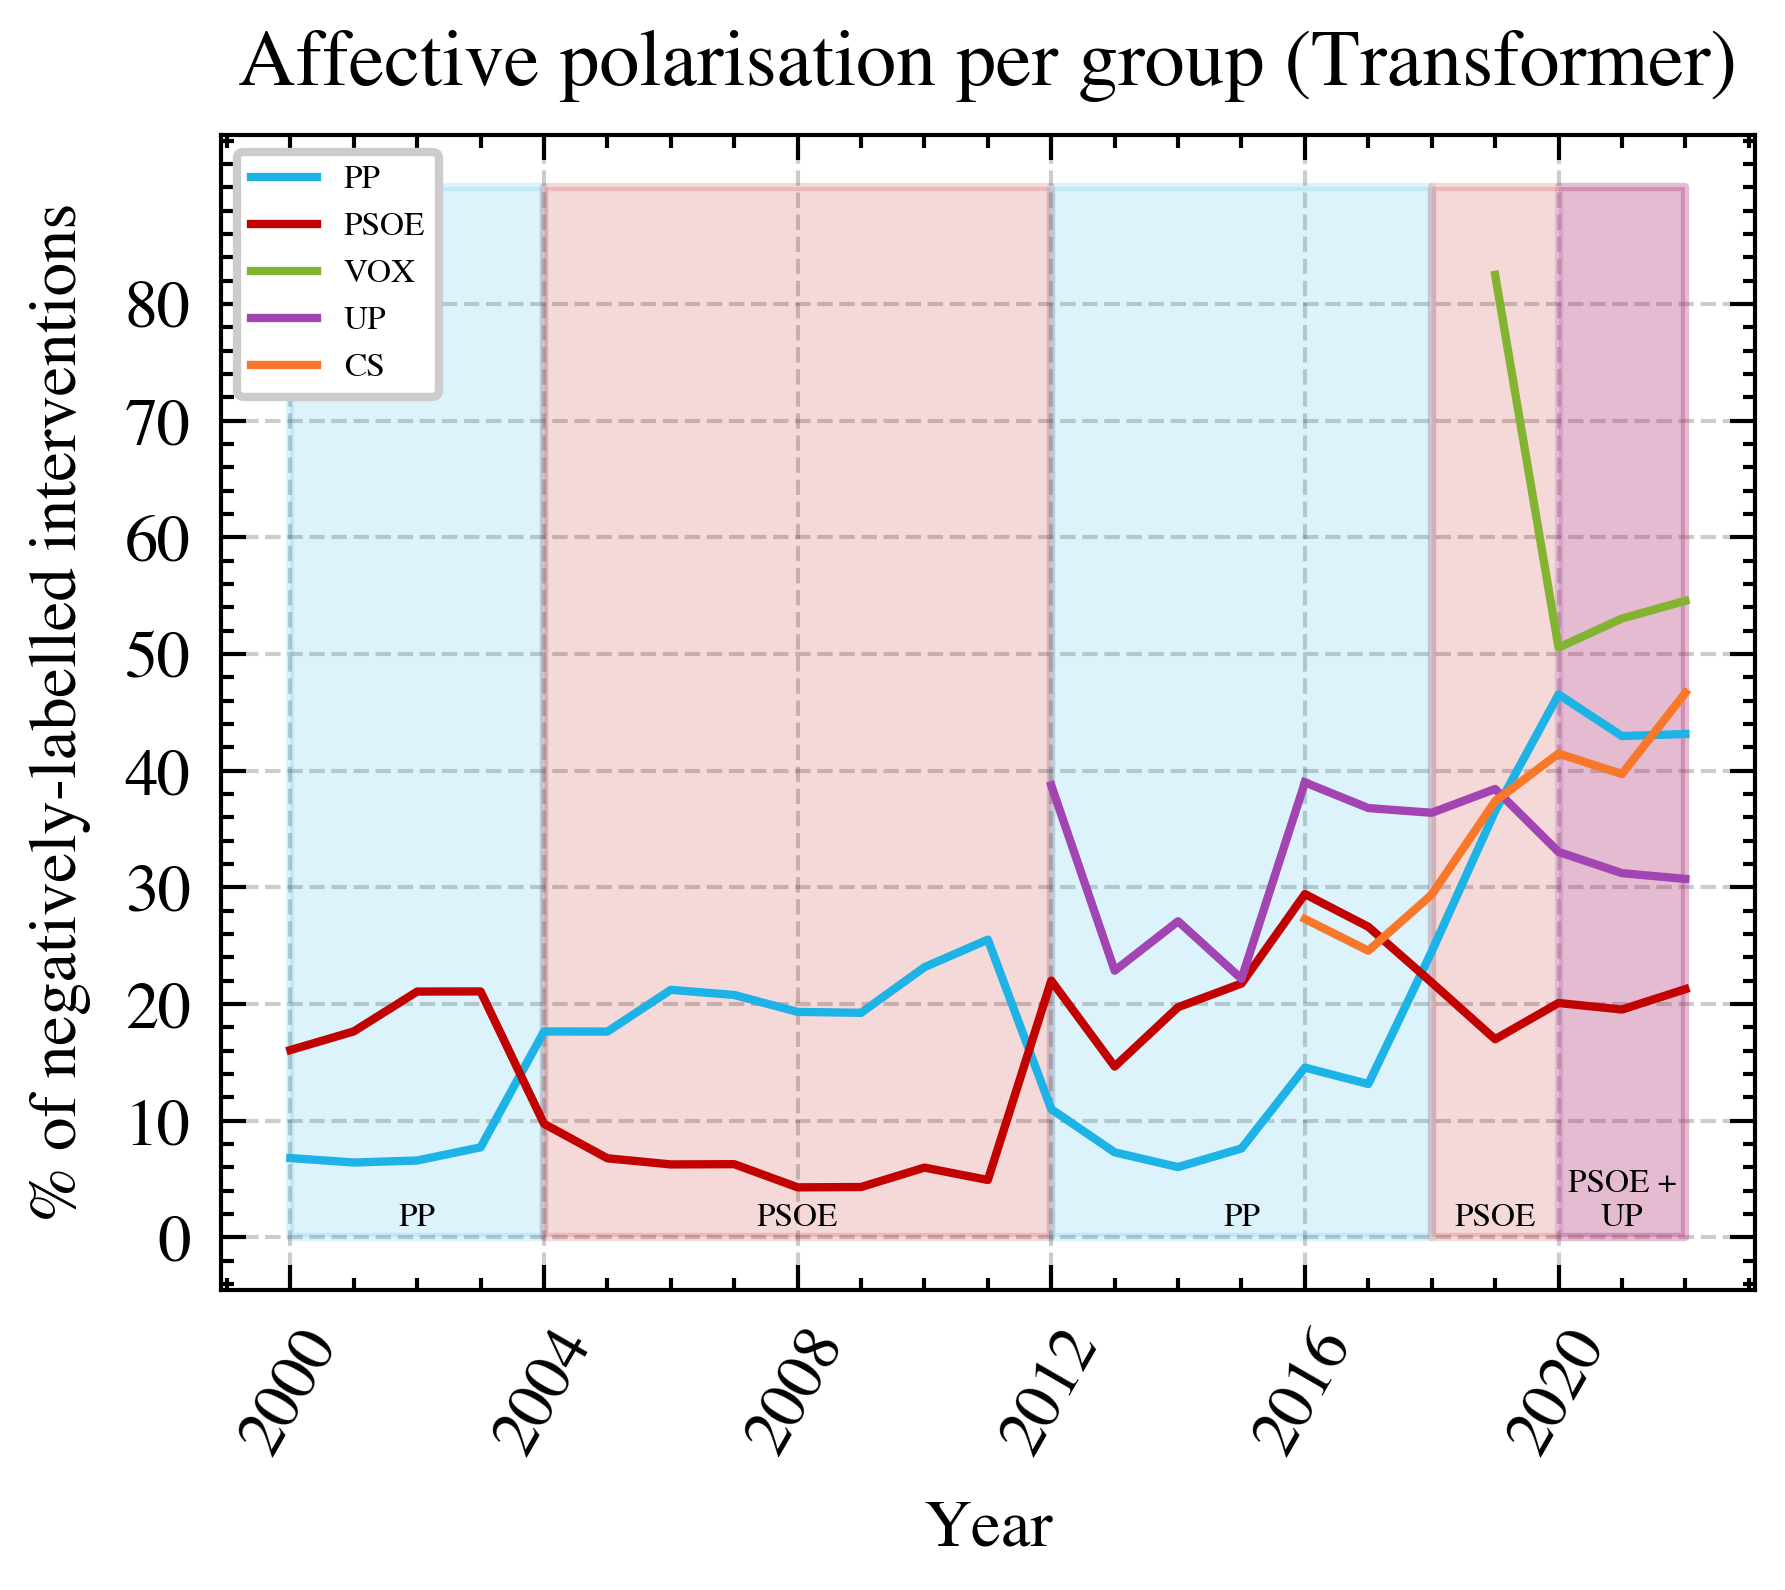

In [147]:
per_group = df.groupby(['political_group', 'y'], as_index=False)['vader_com'].count()
per_group['neg_count'] = df.groupby(['political_group', 'y'], as_index=False)['transf_neg'].sum()['transf_neg']

per_group.columns = ['political_group', 'year', 'count', 'neg_count']

PP = per_group.loc[per_group['political_group'] == 'PP'].set_index('year')
PP = PP['neg_count'] / PP['count'] * 100

PSOE = per_group.loc[per_group['political_group'] == 'PSOE'].set_index('year')
PSOE = PSOE['neg_count'] / PSOE['count'] * 100

VOX = per_group.loc[per_group['political_group'] == 'VOX'].set_index('year')
VOX = VOX['neg_count'] / VOX['count'] * 100

UP = per_group.loc[per_group['political_group'] == 'UP'].set_index('year')
UP = UP['neg_count'] / UP['count'] * 100

IU = per_group.loc[per_group['political_group'] == 'IU'].set_index('year')
IU = IU['neg_count'] / IU['count'] * 100
IU = IU.loc[IU.index > 2011]
IU[2016] = UP[2016]

CS = per_group.loc[per_group['political_group'] == 'CS'].set_index('year')
CS = CS['neg_count'] / CS['count'] * 100

ERC = per_group.loc[per_group['political_group'] == 'ERC'].set_index('year')
ERC = ERC['neg_count'] / ERC['count'] * 100

CIU = per_group.loc[per_group['political_group'] == 'CIU'].set_index('year')
CIU = CIU['neg_count'] / CIU['count'] * 100

EHB = per_group.loc[per_group['political_group'] == 'EHB'].set_index('year')
EHB = EHB['neg_count'] / EHB['count'] * 100

fig, ax = plt.subplots()

ax.plot(PP, label='PP', c='#1eb3e6')
ax.plot(PSOE, label='PSOE', c='#c10200')
ax.plot(VOX, label='VOX', c='#82b431')
ax.plot(UP, label='UP', c='#a245b2')
ax.plot(IU, c='#a245b2')
ax.plot(CS, label='CS', c='#f87729')
#ax.plot(ERC, label='ERC', c='black')
#ax.plot(CIU, label='CIU', c='green')
#ax.plot(EHB, label='EHB', c='yellow')

ax.set_yticks(range(0, 90, 10))
ax.set_xticks(range(2000, 2023, 4))
ax.set_xticklabels(range(2000, 2023, 4), rotation=60)
ax.legend(fontsize=4, loc='upper left')
ax.set_title('Affective polarisation per group (Transformer)')
ax.set_xlabel('Year')
ax.set_ylabel('%' + ' of negatively-labelled interventions')

ax.grid(alpha=.2)

ax.fill_between(PP.index[:5], 90, color='#1eb3e6', alpha=.15)
ax.fill_between(PP.index[4:13], 90, color='#c10200', alpha=.15)
ax.fill_between(PP.index[12:19], 90, color='#1eb3e6', alpha=.15)
ax.fill_between(PP.index[18:], 90, color='#c10200', alpha=.15)
ax.fill_between(PP.index[20:], 90, color='#a245b2', alpha=.2)

ax.text(2002, 1, 'PP', fontsize=4, horizontalalignment='center')
ax.text(2008, 1, 'PSOE', fontsize=4, horizontalalignment='center')
ax.text(2015, 1, 'PP', fontsize=4, horizontalalignment='center')
ax.text(2019, 1, 'PSOE', fontsize=4, horizontalalignment='center')
ax.text(2021, 1, 'PSOE +\nUP', fontsize=4, horizontalalignment='center')


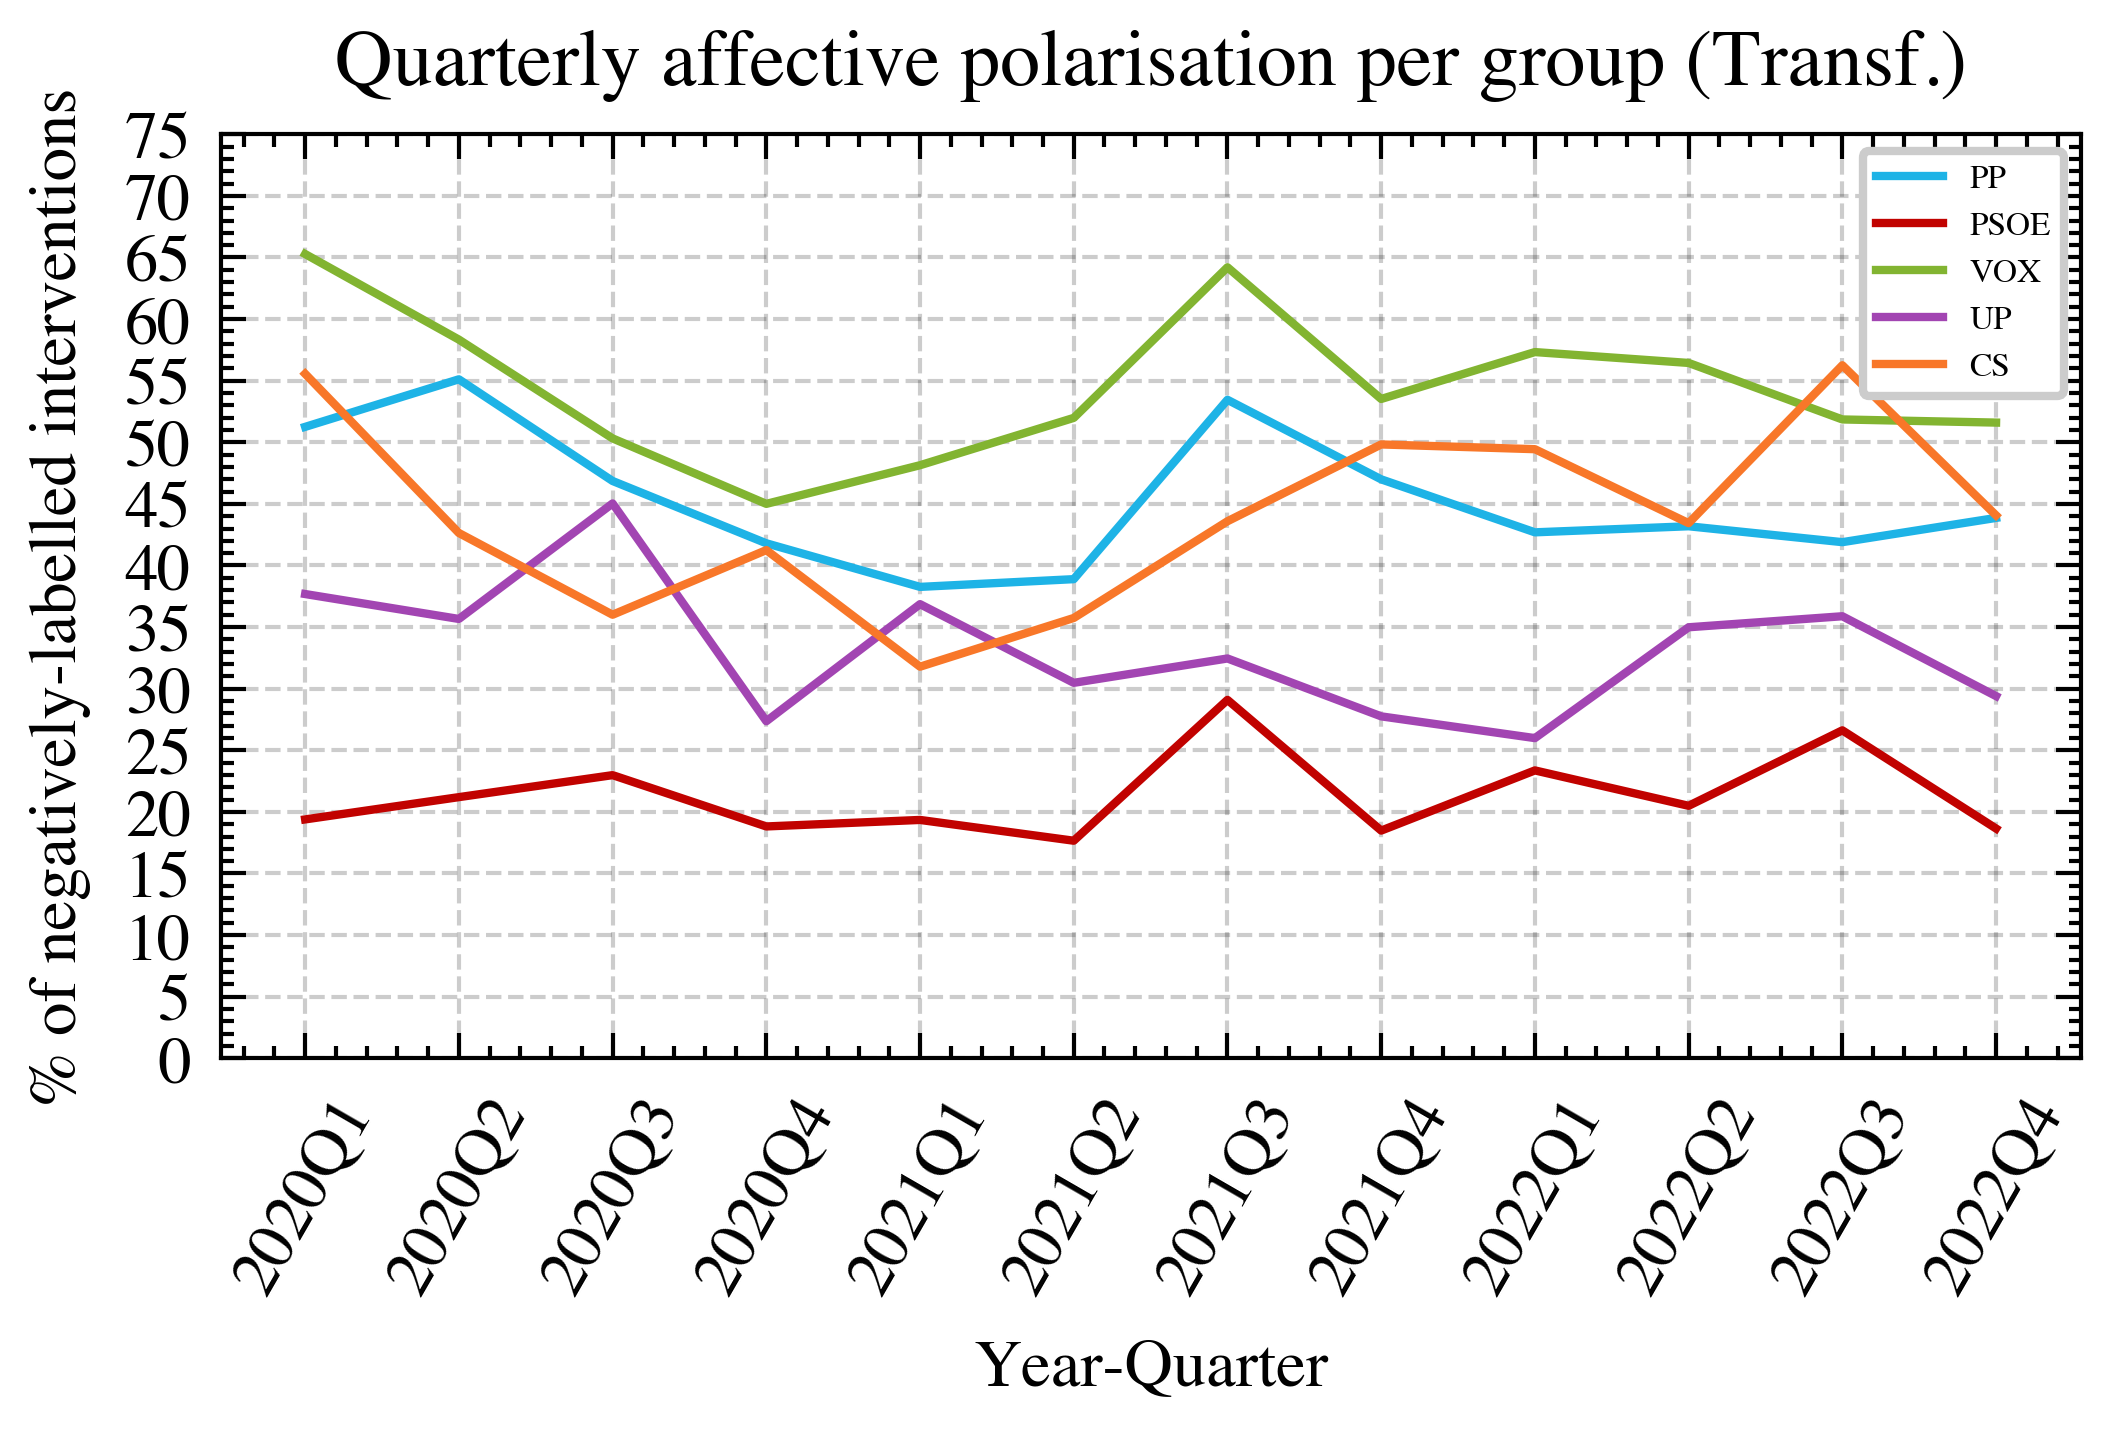

In [162]:
per_group = df.groupby(['political_group', 'y-q'], as_index=False)[
    'vader_com'].count()
per_group['neg_count'] = df.groupby(['political_group', 'y-q'], as_index=False)[
    'transf_neg'].sum()['transf_neg']

per_group = per_group.loc[per_group['y-q'] > '2019Q4']

per_group.columns = ['political_group', 'y-q', 'count', 'neg_count']

PP = per_group.loc[per_group['political_group'] == 'PP'].set_index('y-q')
PP = PP['neg_count'] / PP['count'] * 100

PSOE = per_group.loc[per_group['political_group'] == 'PSOE'].set_index('y-q')
PSOE = PSOE['neg_count'] / PSOE['count'] * 100

VOX = per_group.loc[per_group['political_group'] == 'VOX'].set_index('y-q')
VOX = VOX['neg_count'] / VOX['count'] * 100

UP = per_group.loc[per_group['political_group'] == 'UP'].set_index('y-q')
UP = UP['neg_count'] / UP['count'] * 100

CS = per_group.loc[per_group['political_group'] == 'CS'].set_index('y-q')
CS = CS['neg_count'] / CS['count'] * 100

fig, ax = plt.subplots(figsize=(4, 2))

ax.plot(PP, label='PP', c='#1eb3e6')
ax.plot(PSOE, label='PSOE', c='#c10200')
ax.plot(VOX, label='VOX', c='#82b431')
ax.plot(UP, label='UP', c='#a245b2')
ax.plot(CS, label='CS', c='#f87729')

ax.set_yticks(range(0, 80, 5))
ax.set_xticks(PP.index)
ax.set_xticklabels(PP.index, rotation=60)
ax.legend(fontsize=4)
ax.set_title('Quarterly affective polarisation per group (Transf.)')
ax.set_xlabel('Year-Quarter')
ax.set_ylabel('%' + ' of negatively-labelled interventions')

ax.grid(alpha=.2)

#ax.fill_between(PP.index[:5], 28, color='#1eb3e6', alpha=.15)
#ax.fill_between(PP.index[4:13], 28, color='#c10200', alpha=.15)
#ax.fill_between(PP.index[12:20], 28, color='#1eb3e6', alpha=.15)
#ax.fill_between(PP.index[18:], 28, color='#c10200', alpha=.15)
#ax.fill_between(PP.index[20:], 28, color='#a245b2', alpha=.2)

#ax.text(2002, 1, 'PP', fontsize=4, horizontalalignment='center')
#ax.text(2008, 1, 'PSOE', fontsize=4, horizontalalignment='center')
#ax.text(2016, 1, 'PP', fontsize=4, horizontalalignment='center')
#ax.text(2019, 1, 'PSOE', fontsize=4, horizontalalignment='center')
#ax.text(2021, 1, 'PSOE +\nUP', fontsize=4, horizontalalignment='center')
